# Importing the useful libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, preprocessing

# Dataset Charging and Overview

In [29]:
data = pd.read_csv('breast.data', na_values = ['?'])

In [30]:
data.head()

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [31]:
data1=data.drop(data.iloc[:,0:1],  axis=1)
data1.head()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


# Checking how many data is missing

In [32]:
# There are data missing (?), because I got 16 for all rows in each column
data1.isnull().sum()

Clump_Thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

# Updating the missing values

In [33]:
import math
Bare_Nuclei_mean = data1['Bare_Nuclei'].mean()
Bare_Nuclei_mean = math.floor(Bare_Nuclei_mean)
print('The mean value in the Bare_Nuclei feature is: {}'.format(Bare_Nuclei_mean))

The mean value in the Bare_Nuclei feature is: 3


In [34]:
data1.update(data1['Bare_Nuclei'].fillna(Bare_Nuclei_mean))
data1['Bare_Nuclei'].isnull().sum()

0

# Correlation Matrix

In [35]:
#Correlation Matrix and code here
corr = data1.corr()
corr

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.588433,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.687417,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709812,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666086,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.582331,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.588433,0.687417,0.709812,0.666086,0.582331,1.000000,0.676167,0.577347,0.339844,0.817442
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.676167,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.577347,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339844,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.817442,0.756616,0.712244,0.423170,1.000000


# HEATMAPING

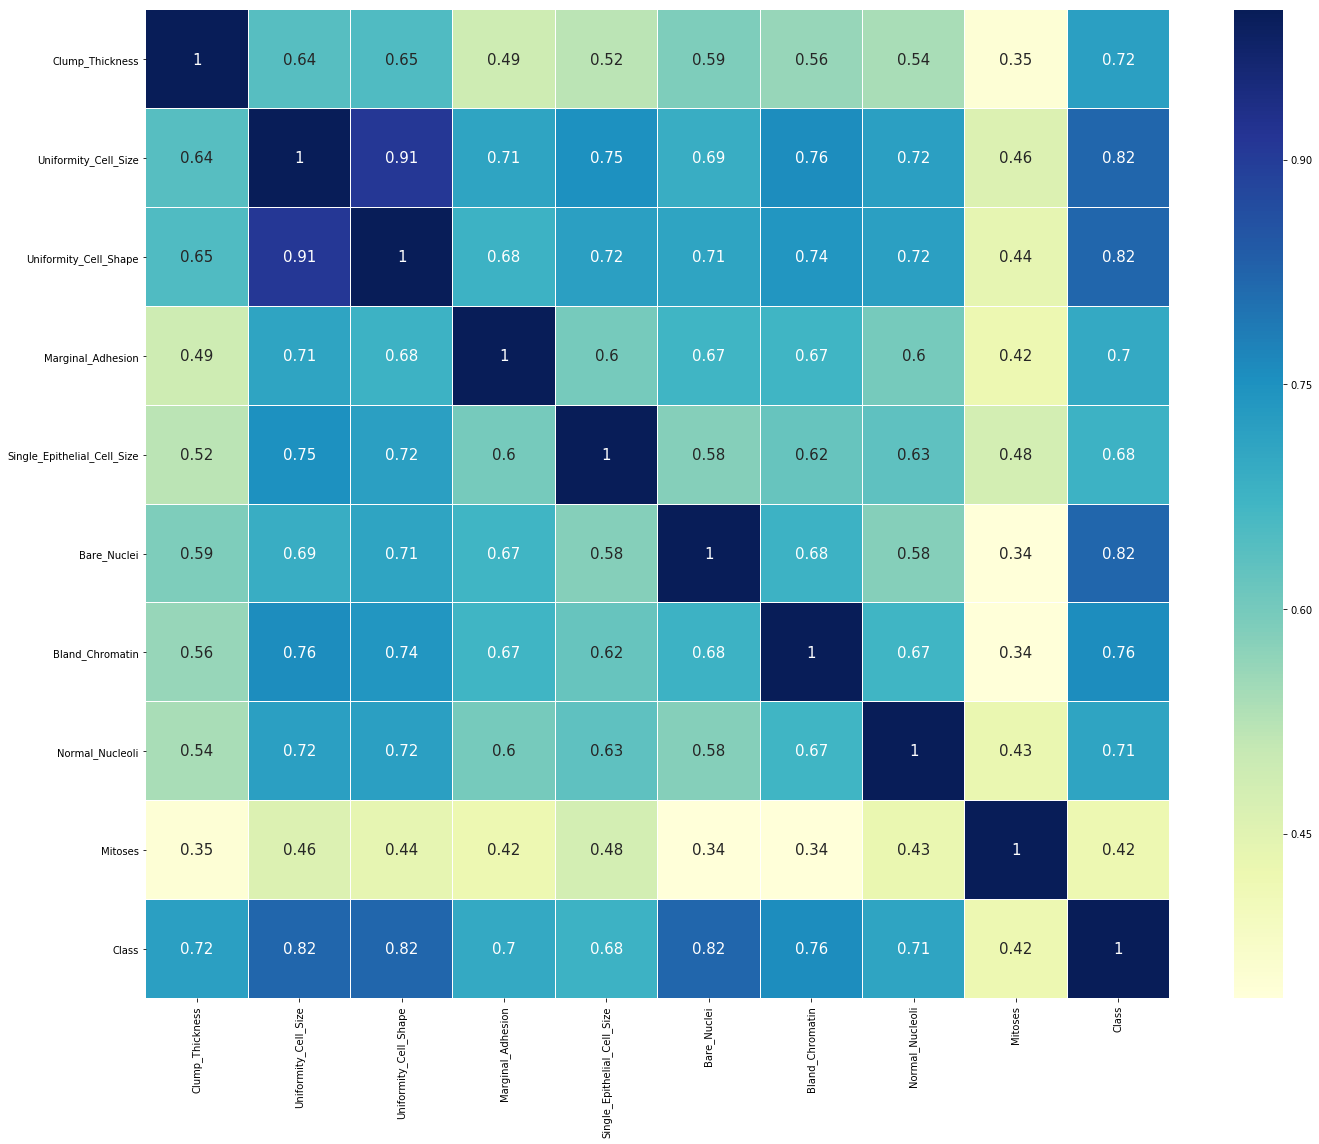

Text(0.5, 0.98, 'Cancer Attributes Correlation Heatmap')

In [36]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig, (ax) = plt.subplots(1, 1, figsize=(20,16))

#On utilise la matrice de correlation pour trouver les correlations entre toutes
sns.heatmap(data=data1.corr().round(2), cmap='YlGnBu', annot=True, 
            annot_kws={"size":15},linewidths= .05)
plt.tight_layout()
plt.show()

fig.suptitle('Cancer Attributes Correlation Heatmap')

# Feature Selection 

In [37]:
X = data1.iloc[:, :-1]
y = data1.iloc[:, 9:10]
print(X.shape)
print(y.shape)

(699, 9)
(699, 1)


# Training and Testing (80% - 20%), Seed = 44

In [38]:
from numpy import nan
from sklearn.impute import SimpleImputer

In [39]:
imp = SimpleImputer(strategy = 'mean')
X = imp.fit_transform(X)
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.iloc[:, :-1], data1.iloc[:, 9:10],test_size = 0.2, random_state = 44)

In [41]:
# Printing the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(559, 9) (140, 9) (559, 1) (140, 1)


In [42]:
X = data1.iloc[:, :-1]
y = data1.iloc[:, 10:11]

# Developping a K value

In [43]:
k = math.sqrt(len(y_train))
k = math.floor(k) - 1
k

22

In [44]:
# X_train = train.as_matrix().astype(np.float)
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

False
True


### Classification with Euclidean =  Minkowski model

In [45]:
# Classifier metric: Euclidean
clf_eucli = neighbors.KNeighborsClassifier(n_neighbors = 22, p=2, metric='euclidean')
clf_eucli

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

In [55]:
clf_eucli.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

In [56]:
# Predict the class in all observations
Z = clf_eucli.predict(X_train)
print(Z.shape)

# Compare all predicted Class with real Class' labels
accuracy = clf_eucli.score(X_train, y_train)
print('Accuracy Model Predicted is: {:.3f}'.format(accuracy))

(559,)
Accuracy Model Predicted is: 0.962


# Test

In [57]:
# Predict the class in all observations in X_test
Z = clf_eucli.predict(X_test)
print(Z.shape)
# Compare all predicted Class' labels with actual Class' labels
accuracy = clf_eucli.score(X_test, y_test)
print('Accuracy Model Predicted is: {:.3f}'.format(accuracy))

(140,)
Accuracy Model Predicted is: 0.986


# Importing Metrics Mesures

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [59]:
cm = confusion_matrix(y_test, Z)
print('Confusion Matrix:')
cm

Confusion Matrix:


array([[90,  1],
       [ 1, 48]])

In [60]:
acc = accuracy_score(y_test, Z)
acc
print('Accuracy: {:.3f}'.format(acc))


Accuracy: 0.986


In [61]:
acc_train = clf_eucli.score(X_train, y_train)
print('Accuracy for Training: {:.3f}'.format(acc_train))

Accuracy for Training: 0.962


In [62]:
acc_test = clf_eucli.score(X_test, y_test)
print('Accuracy for Testing: {:.3f}'.format(acc_test))

Accuracy for Testing: 0.986


In [67]:
data1.head()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [66]:
#To evaluate the algorithme's performance, we use for prediction out-of-sample
ech = [[5,1,1,1,2,1,3,1,1], [3,1,1,1,2,2,3,1,1]]
Z = clf_eucli.predict(ech)
print(Z.shape)
print(Z)

(2,)
[2 2]
